In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the filtered dataset
df = pd.read_csv('FilterColumns.csv')
df

,Hours_Studied,Attendance,Sleep_Hours,Motivation_Level,Parental_Involvement,Access_to_Resources,Tutoring_Sessions,Internet_Access,Extracurricular_Activities,Peer_Influence,Learning_Disabilities,Physical_Activity,Gender
0,23,84,7,Low,Low,High,0,Yes,No,Positive,No,3,Male
1,19,64,8,Low,Low,Medium,2,Yes,No,Negative,No,4,Female
2,24,98,7,Medium,Medium,Medium,2,Yes,Yes,Neutral,No,4,Male
3,29,89,8,Medium,Low,Medium,1,Yes,Yes,Negative,No,4,Male
4,19,92,6,Medium,Medium,Medium,3,Yes,Yes,Neutral,No,4,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,Medium,High,Medium,1,Yes,No,Positive,No,2,Female
6603,23,76,8,Medium,High,Medium,3,Yes,No,Positive,No,2,Female
6604,20,90,6,Low,Medium,Low,3,Yes,Yes,Negative,No,2,Female
6605,10,86,6,High,High,High,2,Yes,Yes,Positive,No,3,Female


In [3]:
# Identify numeric and categorical columns
num_cols = df.select_dtypes(exclude=['object']).columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols, cat_cols

(Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions',
        'Physical_Activity'],
       dtype='object'),
 Index(['Motivation_Level', 'Parental_Involvement', 'Access_to_Resources',
        'Internet_Access', 'Extracurricular_Activities', 'Peer_Influence',
        'Learning_Disabilities', 'Gender'],
       dtype='object'))

In [4]:
# Impute numeric and categorical columns
num_imputer=SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer=SimpleImputer(strategy='most_frequent')
df[cat_cols]= cat_imputer.fit_transform(df[cat_cols])

In [5]:
# Standardize numeric columns and One-Hot Encode categorical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_encoded = encoder.fit_transform(df[cat_cols])
cat_df_data = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())

# Combine processed numeric and categorical data
final_df = pd.concat([df[num_cols].reset_index(drop=True), cat_df_data.reset_index(drop=True)], axis=1)
final_df.head(10)

,Hours_Studied,Attendance,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Parental_Involvement_High,Parental_Involvement_Low,...,Internet_Access_Yes,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
0,0.504942,0.348375,-0.019796,-1.213934,0.031411,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.162822,-1.383736,0.661399,0.411451,1.001199,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.671882,1.560853,-0.019796,0.411451,1.001199,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.506587,0.781403,0.661399,-0.401242,1.001199,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.162822,1.041220,-0.700990,1.224144,1.001199,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,-0.162822,0.694798,0.661399,1.224144,0.031411,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,1.506587,0.348375,-0.019796,-0.401242,-0.938377,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0.838823,-0.171258,-0.700990,-0.401242,-0.938377,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,-0.496704,1.214431,-0.700990,-1.213934,-1.908165,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,0.504942,1.560853,0.661399,-1.213934,1.970988,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [6]:
# Prepare features for PCA and clustering
X_features = final_df.copy()

In [7]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
pca_df.head(10)

,PC1,PC2
0,-0.570599,-0.780205
1,-1.030783,1.432673
2,0.615147,0.395841
3,-0.911012,0.102503
4,1.382013,1.147053
5,0.678841,0.384905
6,-0.488991,-1.201519
7,-0.160679,-0.906289
8,1.058992,-2.421350
9,-0.545782,0.262209


In [8]:
# KMeans Clustering Model
model = KMeans(n_clusters=3, random_state=42)
ref = model.fit_predict(x_pca)

# Evaluate Clustering with Silhouette Score
score_pca = silhouette_score(x_pca, ref)
print("Silhouette Score with PCA:", score_pca)

Silhouette Score with PCA: 0.34137989926194734


In [9]:
# Extract cluster centroids
centroid = model.cluster_centers_

In [10]:
# Append cluster labels to original and PCA DataFrames  
final_df['Cluster'] = ref
pca_df['Cluster'] = ref 

[0.34137989926194734, 0.22206907479523985, 0.1713886201222122, 0.14079832253438504, 0.11918627006529763, 0.10718839406741218, 0.09947918931236897, 0.09135664876973774, 0.08536064519787603, 0.08142403988551368, 0.08216254809066964, 0.07968349085560902, 0.07338513905184149, 0.07084938727204439]


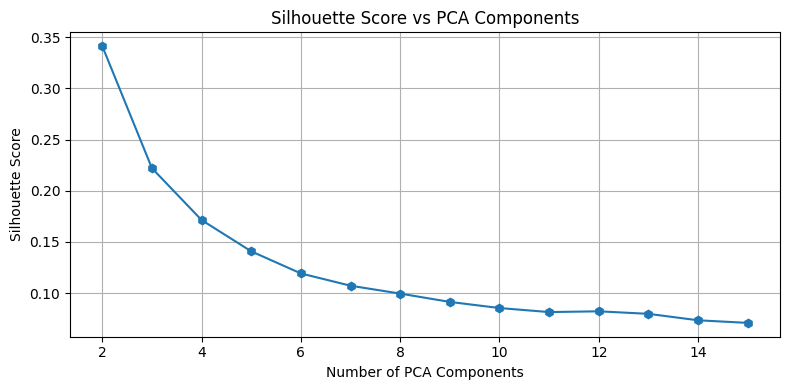

In [11]:
# Silhouette Score for different PCA components
scores = []

for n in range(2, 16):
    pca_model = PCA(n_components=n, random_state=42)
    X_pca = pca_model.fit_transform(X_features)
    label = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)
    score = silhouette_score(X_pca, label)
    scores.append(score)
print(scores)

# Plotting Silhouette Scores
plt.figure(figsize=(8,4))
plt.plot(range(2,16), scores, marker='h')
plt.title('Silhouette Score vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

[58096.799303768676, 53126.67420964576, 50377.839676682896, 47719.464896884296, 45729.52757418288, 44277.30374175965, 43224.47649131637, 42229.31336784942, 41336.426517378015, 40660.67478054781]


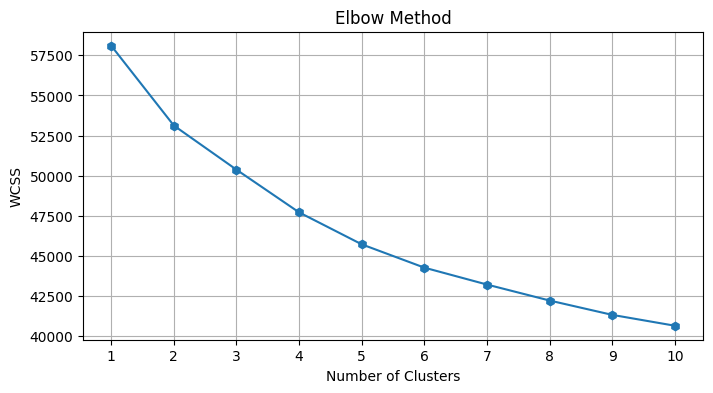

In [12]:
# Elbow Method to find optimal number of clusters
wcss = []

for i in range(1,11):
    k_model = KMeans(n_clusters=i)
    k_model.fit_predict(X_features)
    wcss.append(k_model.inertia_)
print(wcss)

# Plotting the Elbow Method
plt.figure(figsize=(8,4))
plt.plot(range(1,11), wcss, marker='h')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

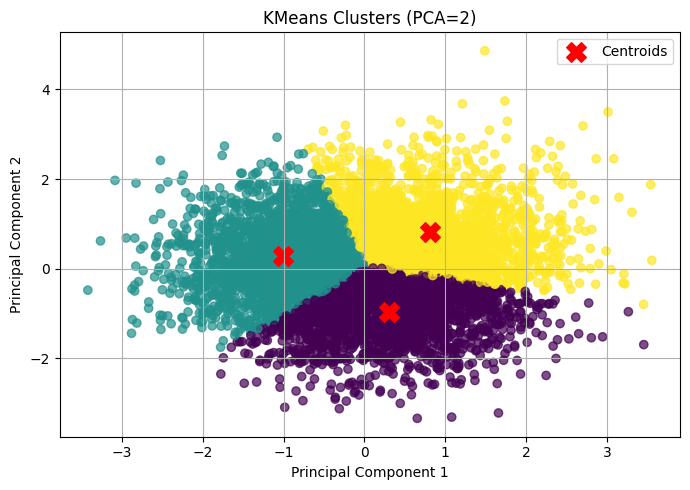

Cluster Centers in PCA Space:


,PC1,PC2
Cluster,,
0,0.305467,-0.980593
1,-1.003931,0.273671
2,0.813981,0.819944


In [13]:
# Visualizing Clusters with PCA=2
plt.figure(figsize=(7, 5))
scatter = plt.scatter( x_pca[:, 0],x_pca[:, 1],c=ref,cmap='viridis',alpha=0.7)

plt.scatter(centroid[:, 0],centroid[:, 1],s=200,marker='X',c='red',label='Centroids')

plt.title("KMeans Clusters (PCA=2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze PCA cluster centers
cluster_summary_pca = pca_df.groupby('Cluster').mean(numeric_only=True)
print("Cluster Centers in PCA Space:")
display(cluster_summary_pca) 

In [14]:
# Analyze Cluster Characteristics
cluster_summary_original = X_features.join(final_df['Cluster']).groupby('Cluster').mean()
print("Cluster Summary in Original Feature Space:")
display(cluster_summary_original)

Cluster Summary in Original Feature Space:


,Hours_Studied,Attendance,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Parental_Involvement_High,Parental_Involvement_Low,...,Internet_Access_Yes,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.048779,0.534613,-0.028358,-0.384333,-0.785783,0.199393,0.285652,0.514954,0.287820,0.207195,...,0.924577,0.399220,0.600780,0.196792,0.407022,0.396186,0.901604,0.098396,0.418292,0.581708
1,0.410970,-0.691416,0.432862,-0.326051,0.379831,0.197147,0.293126,0.509728,0.285776,0.194120,...,0.931258,0.409425,0.590575,0.211846,0.386511,0.401643,0.896671,0.103329,0.428880,0.571120
2,-0.421762,0.184143,-0.470954,0.825773,0.470183,0.202818,0.301963,0.495219,0.293407,0.206341,...,0.916457,0.403120,0.596880,0.217916,0.381983,0.400101,0.884751,0.115249,0.420735,0.579265


In [15]:
cluster_name_map = {
    0: "Regular Attendees",       # high attendance, very regular
    1: "Focused Learners",        # balanced activity & learning
    2: "Active Improvers"         # high tutoring & activity
}

final_df["Cluster_Name"] = final_df["Cluster"].map(cluster_name_map)
pca_df["Cluster_Name"] = pca_df["Cluster"].map(cluster_name_map)
display(final_df.head(10))
display(pca_df.head(10))

,Hours_Studied,Attendance,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Parental_Involvement_High,Parental_Involvement_Low,...,Extracurricular_Activities_Yes,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male,Cluster,Cluster_Name
0,0.504942,0.348375,-0.019796,-1.213934,0.031411,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,Regular Attendees
1,-0.162822,-1.383736,0.661399,0.411451,1.001199,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Focused Learners
2,0.671882,1.560853,-0.019796,0.411451,1.001199,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2,Active Improvers
3,1.506587,0.781403,0.661399,-0.401242,1.001199,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,Focused Learners
4,-0.162822,1.041220,-0.700990,1.224144,1.001199,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2,Active Improvers
5,-0.162822,0.694798,0.661399,1.224144,0.031411,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2,Active Improvers
6,1.506587,0.348375,-0.019796,-0.401242,-0.938377,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,Regular Attendees
7,0.838823,-0.171258,-0.700990,-0.401242,-0.938377,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,Regular Attendees
8,-0.496704,1.214431,-0.700990,-1.213934,-1.908165,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,Regular Attendees
9,0.504942,1.560853,0.661399,-1.213934,1.970988,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,Focused Learners


,PC1,PC2,Cluster,Cluster_Name
0,-0.570599,-0.780205,0,Regular Attendees
1,-1.030783,1.432673,1,Focused Learners
2,0.615147,0.395841,2,Active Improvers
3,-0.911012,0.102503,1,Focused Learners
4,1.382013,1.147053,2,Active Improvers
5,0.678841,0.384905,2,Active Improvers
6,-0.488991,-1.201519,0,Regular Attendees
7,-0.160679,-0.906289,0,Regular Attendees
8,1.058992,-2.421350,0,Regular Attendees
9,-0.545782,0.262209,1,Focused Learners


In [16]:
# Analyze counts per cluster
print("Cluster counts:")
final_df["Cluster_Name"].value_counts()

Cluster counts:


Cluster_Name
Focused Learners     2313
Regular Attendees    2307
Active Improvers     1987
Name: count, dtype: int64

In [17]:
# Analyze Cluster Characteristics
print("\nCluster Summary by Category:")
display(final_df.groupby("Cluster_Name")[["Hours_Studied", "Attendance","Tutoring_Sessions", "Physical_Activity","Sleep_Hours"]].mean())


Cluster Summary by Category:


,Hours_Studied,Attendance,Tutoring_Sessions,Physical_Activity,Sleep_Hours
Cluster_Name,,,,,
Active Improvers,-0.421762,0.184143,0.825773,0.470183,-0.470954
Focused Learners,0.410970,-0.691416,-0.326051,0.379831,0.432862
Regular Attendees,-0.048779,0.534613,-0.384333,-0.785783,-0.028358


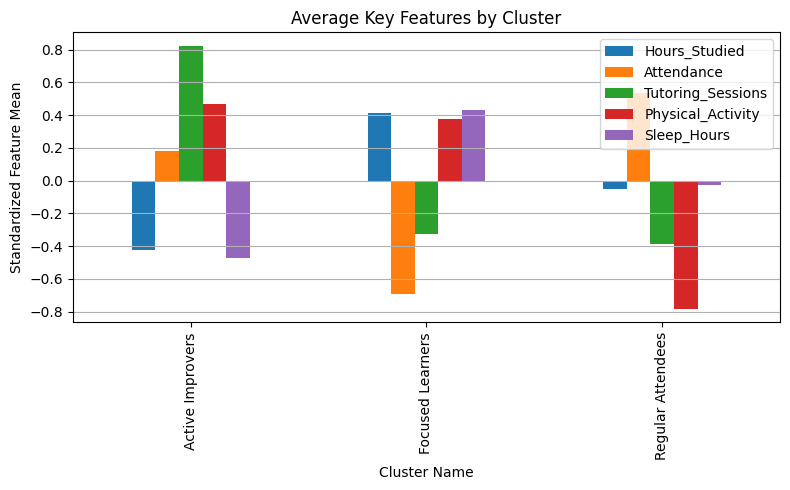

In [18]:
# Visualize key features by cluster
key_features = ["Hours_Studied", "Attendance", "Tutoring_Sessions", "Physical_Activity", "Sleep_Hours"]
cluster_summary = final_df.groupby("Cluster_Name")[key_features].mean()

cluster_summary.plot(kind="bar", figsize=(8,5))
plt.title("Average Key Features by Cluster")
plt.ylabel("Standardized Feature Mean")
plt.xlabel("Cluster Name")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
rule_input_df = final_df[[
    "Hours_Studied",
    "Attendance",
    "Tutoring_Sessions",
    "Physical_Activity",
    "Sleep_Hours",
    "Cluster_Name"
]].copy()

rule_input_df.to_csv("output/processed_for_recommendation.csv", index=False)

In [21]:
import joblib

joblib.dump(num_imputer, "artifacts/num_imputer.pkl")
joblib.dump(cat_imputer, "artifacts/cat_imputer.pkl")
joblib.dump(scaler, "artifacts/scaler.pkl")
joblib.dump(encoder, "artifacts/encoder.pkl")
joblib.dump(pca, "artifacts/pca.pkl")
joblib.dump(model, "artifacts/kmeans.pkl")

# Save column info
joblib.dump(num_cols.tolist(), "artifacts/num_cols.pkl")
joblib.dump(cat_cols.tolist(), "artifacts/cat_cols.pkl")
joblib.dump(final_df.drop(columns=["Cluster","Cluster_Name"]).columns.tolist(),
            "artifacts/final_columns.pkl")


['artifacts/final_columns.pkl']